In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
# Load dataset with correct encoding
df = pd.read_csv("/content/Superstore.csv", encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [33]:
df.shape

(9994, 21)

In [34]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [35]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9989,False
9990,False
9991,False
9992,False


In [36]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [37]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['week'] = df['Order Date'].dt.isocalendar().week
df['day'] = df['Order Date'].dt.day
df['day of week'] = df['Order Date'].dt.day_of_week

In [38]:
df.drop(columns=[
    'Row ID',
    'Order ID',
    'Customer ID',
    'Customer Name',
    'Postal Code',
    'Product ID'
], inplace=True)

In [39]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

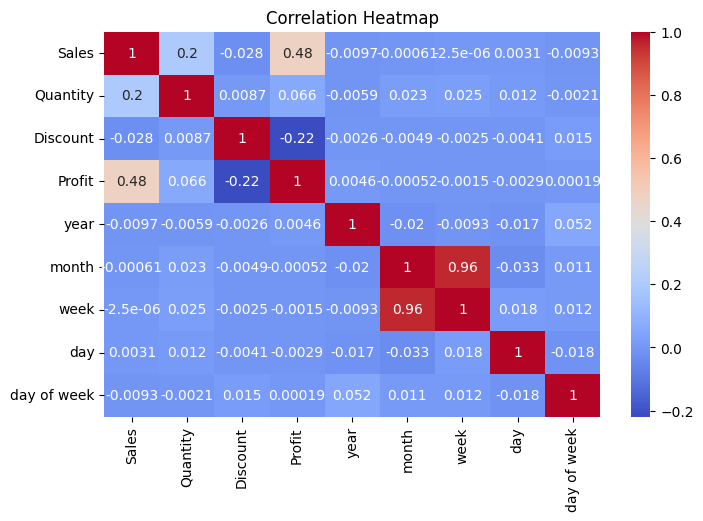

In [40]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


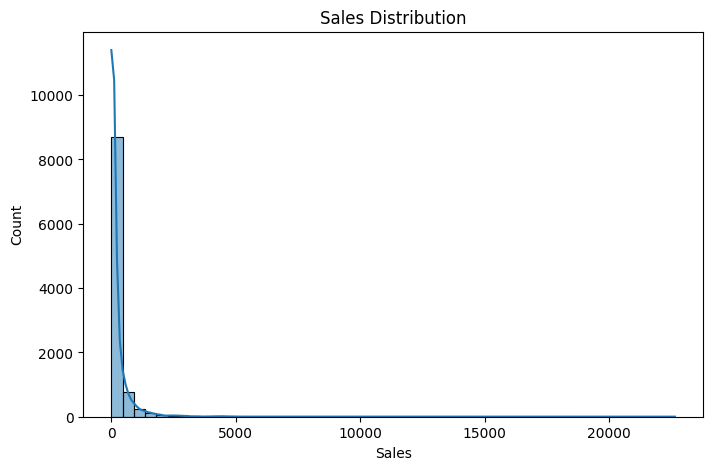

In [41]:
# Distribution of Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()

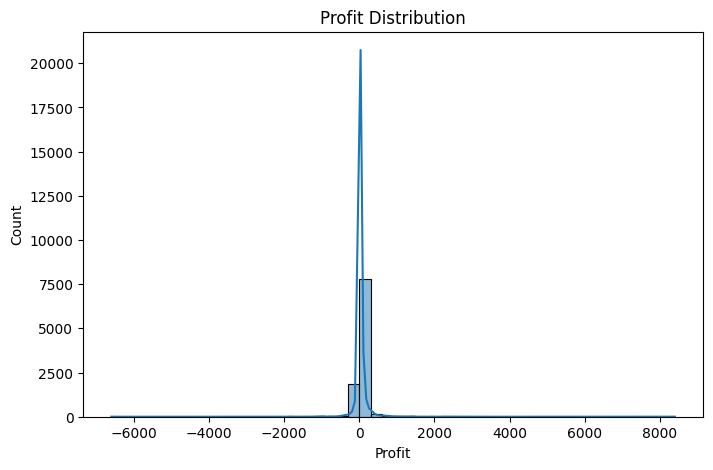

In [42]:
# Distribution of Profit
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=50, kde=True)
plt.title("Profit Distribution")
plt.show()


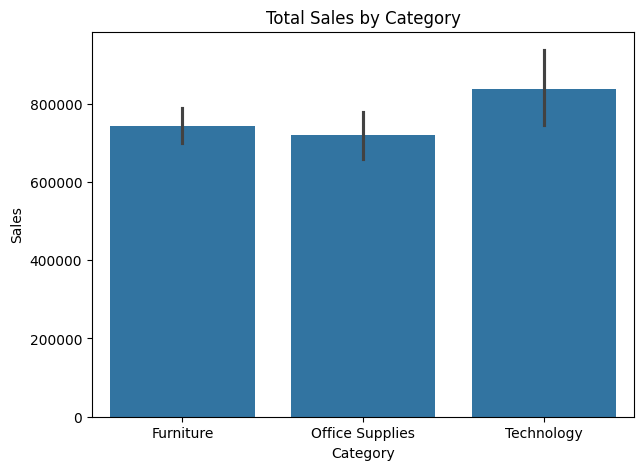

In [43]:

# Total Sales by Category
plt.figure(figsize=(7,5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Category")
plt.show()

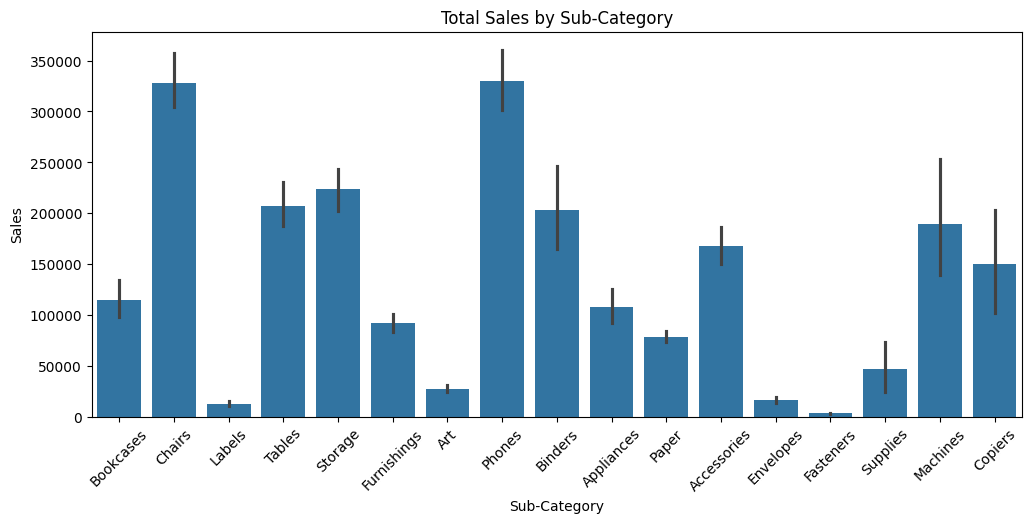

In [44]:

# Total Sales by Sub-Category
plt.figure(figsize=(12,5))
sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum)
plt.xticks(rotation=45)
plt.title("Total Sales by Sub-Category")
plt.show()


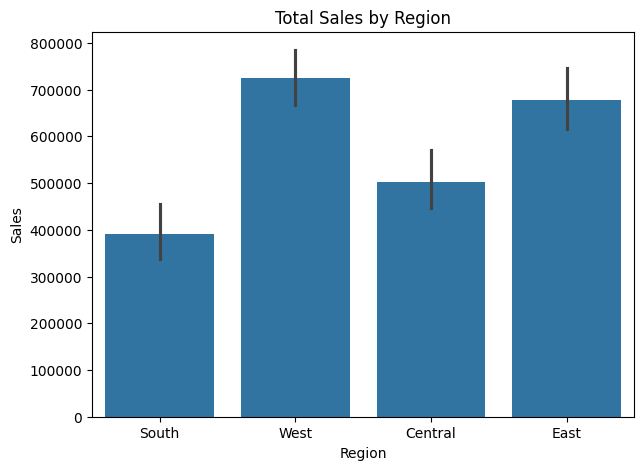

In [45]:

# Total Sales by Region
plt.figure(figsize=(7,5))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Region")
plt.show()


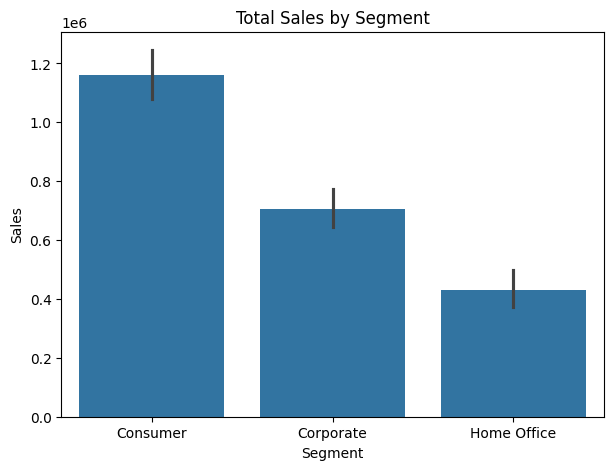

In [46]:
# Total Sales by Segment
plt.figure(figsize=(7,5))
sns.barplot(x='Segment', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Segment")
plt.show()

In [47]:
#ds,y
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

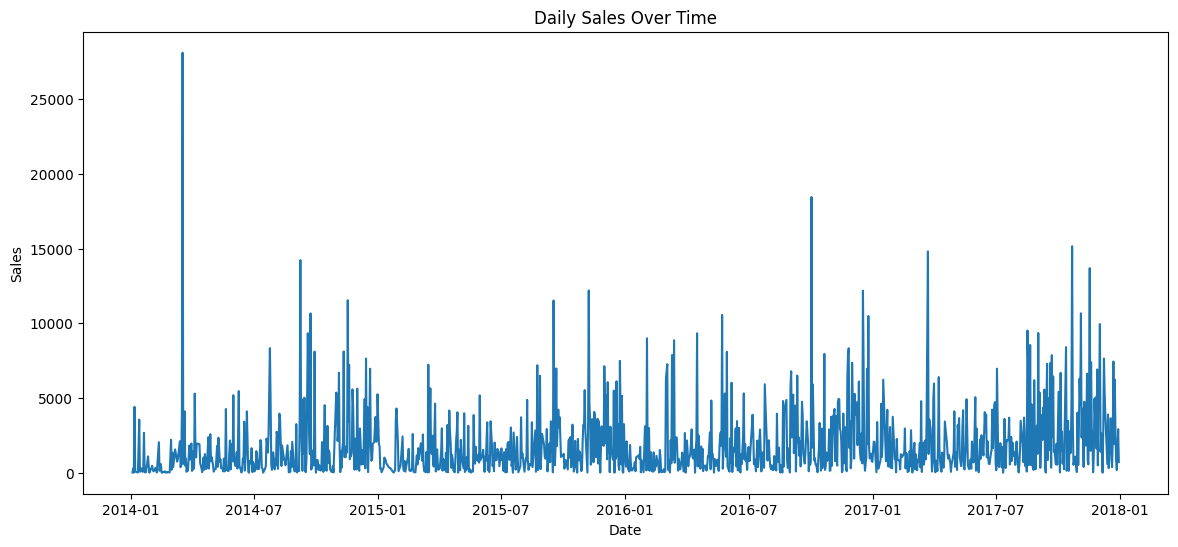

In [48]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [49]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

df['Profit'] = np.where(df['Profit'] > upper_bound, upper_bound, df['Profit'])

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo10_hmle/qjau2wlo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo10_hmle/uq98t89w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85046', 'data', 'file=/tmp/tmpo10_hmle/qjau2wlo.json', 'init=/tmp/tmpo10_hmle/uq98t89w.json', 'output', 'file=/tmp/tmpo10_hmle/prophet_modelxg7web2h/prophet_model-20250815163118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:31:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:31:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


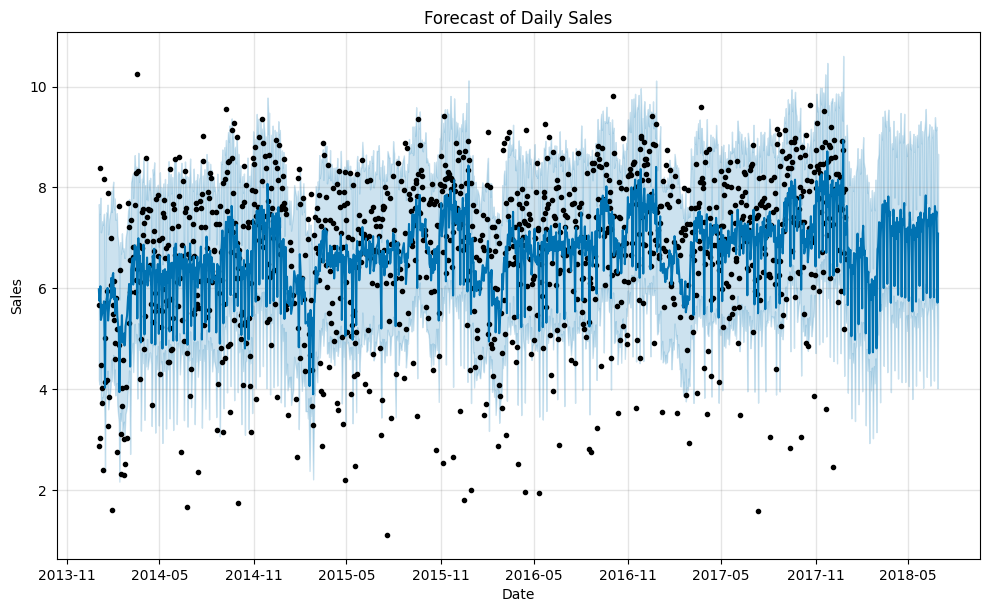

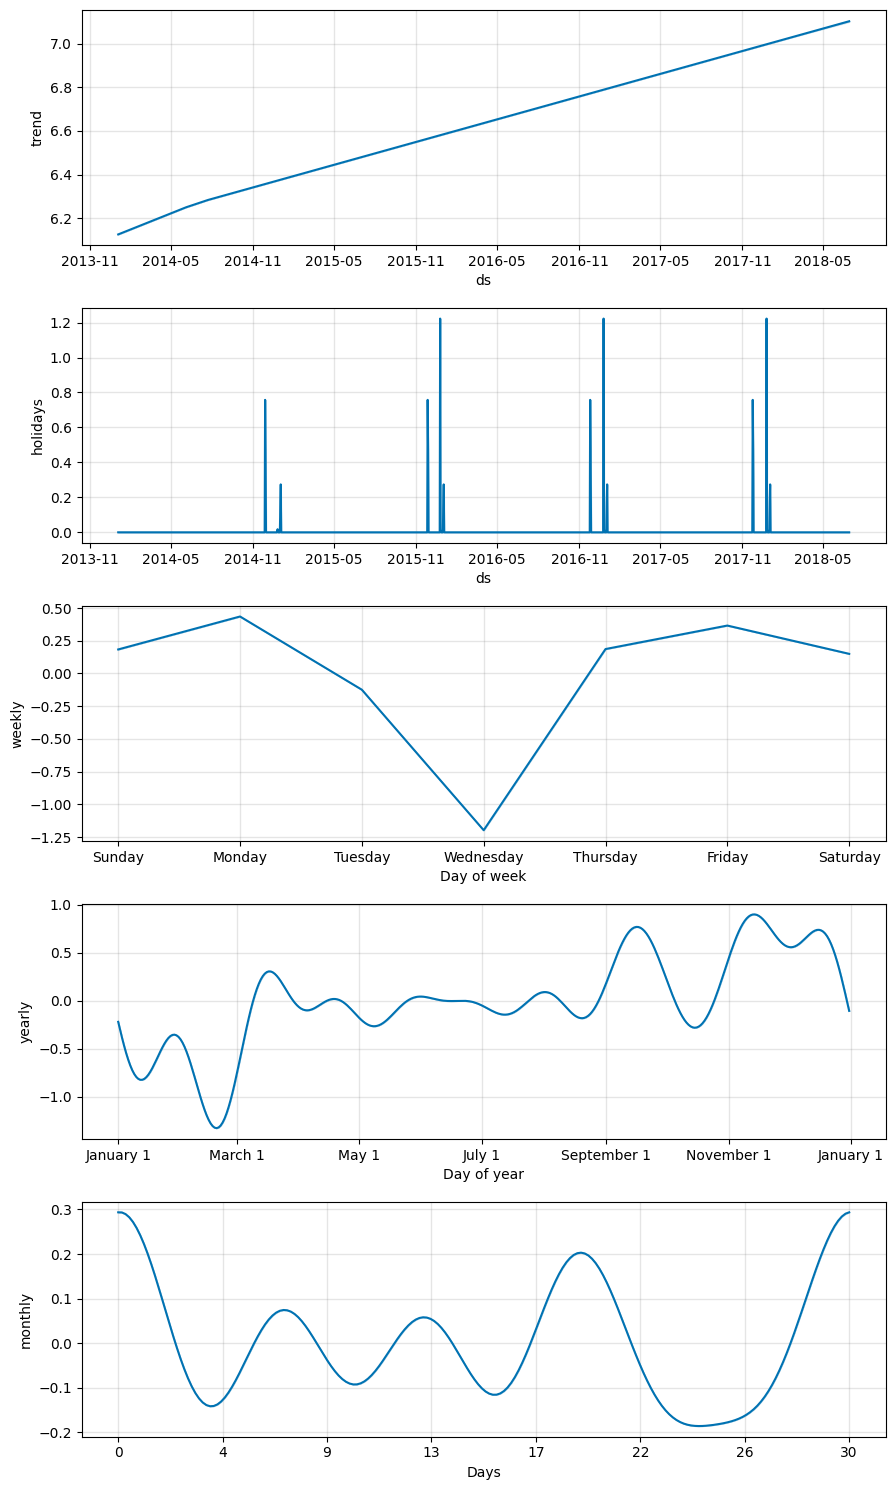

In [50]:
from prophet import Prophet

daily_sales = daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
holidays = pd.DataFrame({
    'holiday': ['Black Friday']*4 + ['Christmas']*4 + ['New Year']*4,
    'ds': pd.to_datetime([
        '2014-11-28', '2015-11-27', '2016-11-25', '2017-11-24',
        '2014-12-25', '2015-12-25', '2016-12-25', '2017-12-25',
        '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'
    ]),
    'lower_window': 0,
    'upper_window': 1
})


model = Prophet(holidays=holidays,
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False)

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

daily_sales['y'] = np.log1p(daily_sales['y'])
model.fit(daily_sales)

future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Forecast of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

INFO:prophet:Making 4 forecasts with cutoffs between 2016-04-09 00:00:00 and 2017-10-01 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo10_hmle/kg0kbt0q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo10_hmle/f9rhc5l8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2883', 'data', 'file=/tmp/tmpo10_hmle/kg0kbt0q.json', 'init=/tmp/tmpo10_hmle/f9rhc5l8.json', 'output', 'file=/tmp/tmpo10_hmle/prophet_modelnh978kou/prophet_model-20250815163121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:31:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:31:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo10_hmle/yc_yu0ur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo10_hmle/slkyj6_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  horizon       mse      rmse       mae      mape     mdape     smape  \
0  9 days  2.121625  1.456580  1.103800  0.241323  0.112219  0.186350   
1 10 days  2.156789  1.468601  1.136634  0.248115  0.123293  0.192304   
2 11 days  2.215552  1.488473  1.184114  0.246500  0.130323  0.195480   
3 12 days  2.025462  1.423187  1.154162  0.217904  0.137895  0.182546   
4 13 days  1.552297  1.245912  1.021883  0.167994  0.123293  0.155623   

   coverage  
0  0.812500  
1  0.822917  
2  0.820312  
3  0.828125  
4  0.843750  


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


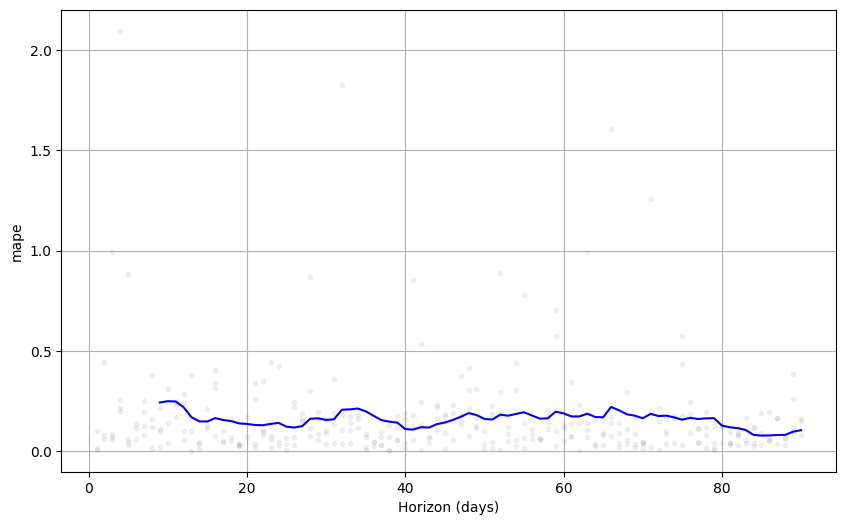

In [51]:
from prophet.diagnostics import cross_validation, performance_metrics
# horizon: how far into the future to forecast each time (e.g., 90 days)
# initial: size of the initial training period (e.g., 730 days ~ 2 years)
# period: spacing between cutoff dates

df_cv = cross_validation(model,
                         initial='730 days',
                         period='180 days',
                         horizon = '90 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Merge forecast with actuals
df_merged = pd.merge(daily_sales, forecast[['ds', 'yhat']], left_on='ds', right_on='ds', how='inner')

# Calculate error metrics
mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
rmse = np.sqrt(mean_squared_error(df_merged['y'], df_merged['yhat']))
mape = np.mean(np.abs((df_merged['y'] - df_merged['yhat']) / df_merged['y'])) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Save combined dataset for Power BI
df_merged.to_csv('historical_and_forecast_sales.csv', index=False)


MAE: 1.04
RMSE: 1.34
MAPE: 19.82%


In [53]:
# Get last available date in historical data
last_date = daily_sales['ds'].max()

# Filter only future forecasted dates
future_forecast = forecast[forecast['ds'] > last_date]

# Save future forecast
future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('future_forecasted_sales.csv', index=False)

"# Get last available date in historical data\nlast_date = daily_sales['ds'].max()\n\n# Filter only future forecasted dates\nfuture_forecast = forecast[forecast['ds'] > last_date]\n\n# Save future forecast\nfuture_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('future_forecasted_sales.csv', index=False)"

In [54]:
# Save historical daily sales
daily_sales.to_csv('historical_daily_sales.csv', index=False)

"# Save historical daily sales\ndaily_sales.to_csv('historical_daily_sales.csv', index=False)"